In [83]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('malware_train1.csv', low_memory=False)

In [3]:
null_ratio = df.apply(lambda x: sum(x.isnull())/len(df),axis=0)

In [4]:
for index, value in null_ratio.iteritems():
    if value > 0.05:
        print("{}: {}".format(index, value))
        df = df.drop(columns=[index])

DefaultBrowsersIdentifier: 0.9759036144578314
OrganizationIdentifier: 0.3092369477911647
PuaMode: 1.0
SmartScreen: 0.37751004016064255
Census_ProcessorClass: 1.0
Census_InternalBatteryType: 0.7550200803212851
Census_IsFlightingInternal: 0.8795180722891566
Census_ThresholdOptIn: 0.6666666666666666
Census_IsWIMBootEnabled: 0.6666666666666666


In [5]:
df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,249.0,249.000000,249.000000,248.000000,248.000000,248.000000,249.000000,249.000000,238.000000,249.000000,...,244.000000,245.000000,249.000000,247.000000,249.000000,249.000000,247.000000,239.000000,239.000000,249.000000
mean,0.0,6.863454,0.020080,48878.854839,1.217742,1.004032,0.979920,104.995984,79302.899160,168.293173,...,393.643443,32432.632653,0.445783,0.008097,0.120482,0.028112,0.060729,0.280335,8.205021,0.550201
std,0.0,0.986517,0.140558,12970.535089,0.441941,0.063500,0.140558,62.714889,46437.016019,89.540710,...,224.338405,20859.143347,0.498053,0.089801,0.326180,0.165627,0.239317,0.450105,4.590342,0.498475
min,0.0,0.000000,0.000000,3371.000000,1.000000,1.000000,0.000000,2.000000,666.000000,10.000000,...,93.000000,1342.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,51.000000,39230.000000,89.000000,...,142.000000,12961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,93.000000,79396.000000,175.000000,...,500.000000,33076.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,160.000000,114347.250000,255.000000,...,556.000000,51075.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,64391.000000,3.000000,2.000000,1.000000,222.000000,167907.000000,295.000000,...,897.000000,70536.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [38]:

for col in df:
#     print('{}: {}'.format(col, len(df[col].unique())))
    if (df[col].nunique()) <= 3:
        print(col)
        print(df[col].unique())
        print()
        

ProductName
['win8defender' 'mse']

IsBeta
[0]

RtpStateBitfield
[7 0 8]

IsSxsPassiveMode
[0 1]

AVProductsInstalled
[ 2.  1.  3. nan]

AVProductsEnabled
[ 1.  2. nan]

HasTpm
[1 0]

Processor
['x64' 'x86']

OsVer
['10.0.0.0' '6.1.1.0' '6.3.0.0']

OsSuite
[768 256 272]

IsProtected
[ 0.  1. nan]

AutoSampleOptIn
[0]

SMode
[ 0. nan]

Firewall
[ 1. nan  0.]

UacLuaenable
[1 0]

Census_DeviceFamily
['Windows.Desktop' 'Windows.Server']

Census_ProcessorManufacturerIdentifier
[ 5.  1. nan]

Census_HasOpticalDiskDrive
[0 1]

Census_OSArchitecture
['amd64' 'x86']

Census_IsPortableOperatingSystem
[0]

Census_GenuineStateName
['IS_GENUINE' 'OFFLINE' 'INVALID_LICENSE']

Census_IsFlightsDisabled
[ 0. nan]

Census_FlightRing
['Retail' 'NOT_SET' 'Unknown']

Census_IsSecureBootEnabled
[1 0]

Census_IsVirtualDevice
[ 0. nan  1.]

Census_IsTouchEnabled
[0 1]

Census_IsPenCapable
[0 1]

Census_IsAlwaysOnAlwaysConnectedCapable
[ 0.  1. nan]

Wdft_IsGamer
[ 0.  1. nan]

HasDetections
[0 1]



In [78]:
# #Fill the null values with the max value in the respective column for bool dtype columns
# for col in df:
#     if (df[col].nunique()) <= 3:
#         val= (df[col].value_counts().to_frame().reset_index())
#         df[col]=df[col].fillna(val[col].max())

In [79]:
#fill missing values with frequently occurred values
for col in df:
    (df[col].fillna(df[col].mode()[0],inplace=True))

In [114]:
#Remove values which are two standard deviatoin away from median
int_columns = df.select_dtypes(include=['integer','float']).columns
outlier_columns = []
for i in int_columns:
    if df[i].nunique() >= 3:
        outlier_columns.append(i)
int_df = df[[x for x in outlier_columns]].copy()
for col in outlier_columns:
    df=df[np.abs(df[col]-df[col].median()) <= (2*df[col].std())]

In [115]:
#class imbalance verification
df['HasDetections'].value_counts()

1    4
Name: HasDetections, dtype: int64

In [116]:
# int_df= int_df.join(df['HasDetections'])
(int_df.corr())

,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalBatteryNumberOfCharges,Census_OSBuildRevision,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier
Census_OEMNameIdentifier,1.000000,-0.988674,0.029333,-0.643312,-0.398787,-0.392382,0.768427,-0.562359,0.716119,0.999422,-0.999913
Census_OEMModelIdentifier,-0.988674,1.000000,0.119362,0.741398,0.370178,0.520654,-0.704678,0.679989,-0.634158,-0.993201,0.990425
Census_ProcessorModelIdentifier,0.029333,0.119362,1.000000,0.720383,-0.036734,0.900124,0.462738,0.795305,0.434159,-0.004071,-0.016507
Census_PrimaryDiskTotalCapacity,-0.643312,0.741398,0.720383,1.000000,0.419480,0.950558,-0.076733,0.931645,-0.266333,-0.666377,0.653338
Census_SystemVolumeTotalCapacity,-0.398787,0.370178,-0.036734,0.419480,1.000000,0.243043,0.108160,0.061421,-0.811515,-0.391859,0.401181
Census_TotalPhysicalRAM,-0.392382,0.520654,0.900124,0.950558,0.243043,1.000000,0.155543,0.942809,0.028849,-0.421855,0.404406
Census_InternalPrimaryDiagonalDisplaySizeInInches,0.768427,-0.704678,0.462738,-0.076733,0.108160,0.155543,1.000000,-0.146647,0.471170,0.756241,-0.761318
Census_InternalBatteryNumberOfCharges,-0.562359,0.679989,0.795305,0.931645,0.061421,0.942809,-0.146647,1.000000,0.020400,-0.590155,0.572263
Census_OSBuildRevision,0.716119,-0.634158,0.434159,-0.266333,-0.811515,0.028849,0.471170,0.020400,1.000000,0.698303,-0.712441
Census_FirmwareManufacturerIdentifier,0.999422,-0.993201,-0.004071,-0.666377,-0.391859,-0.421855,0.756241,-0.590155,0.698303,1.000000,-0.999744


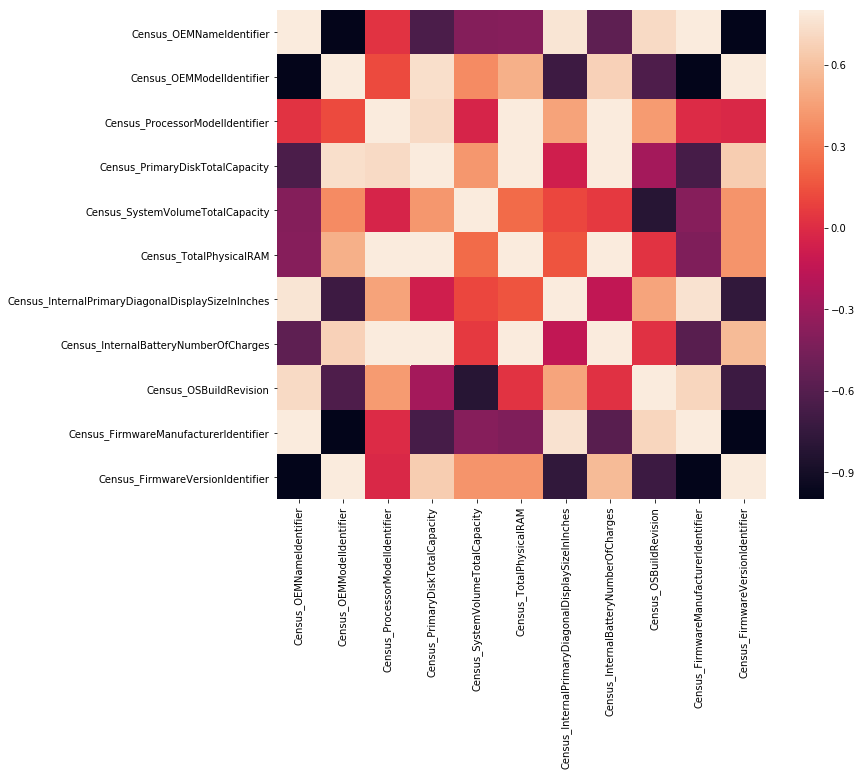

In [117]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(int_df.corr(), vmax=.8, square=True)

In [135]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy')
classifier.fit(df.iloc[:,0:-1].values,df.iloc[:,-1].values)
print(classifier.feature_importances_)

ValueError: could not convert string to float: 'Retail'